In [30]:
#Først importeres de relevante packages til at downloade og åbne zipfilen
import zipfile
import urllib.request
import shutil
import pandas as pd

#Hjemmesiden og filnavnet specificeres
url = 'http://www.ices.dk/marine-data/Documents/CatchStats/OfficialNominalCatches.zip'
file_name = 'OfficialNominalCatches.zip'

#Vi "kalder" zip-filen fra url'en vha. urllib.request
with urllib.request.urlopen(url) as response, open(file_name, 'wb') as out_file:
    shutil.copyfileobj(response, out_file)
    with zipfile.ZipFile(file_name) as zf:
        zf.extractall()

In [31]:
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv("ICESCatchDataset2006-2016.csv") 

# Preview the first 5 lines of the loaded data 
data.head()

,Species,Area,Units,Country,2016,2015,2014,2013,2012,2011,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,ANF,27.4,TLW,BE,253.3,200.3,216.9,136.8,132.8,116.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ANF,27.7,TLW,BE,963.4,722.8,491.1,1123.8,1381.5,966.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ANF,27.8,TLW,BE,216.0,181.0,285.4,372.5,201.2,196.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ANF,27,TLW,BE,1432.7,1104.1,993.4,1633.1,1715.5,1278.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ANF,27.4.a,TLW,BE,0.0,0.0,0.0,0.1,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#Drop columns if all values are NaN
data.dropna(axis="columns", how="all", inplace=True)
data.head()

,Species,Area,Units,Country,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006
0,ANF,27.4,TLW,BE,253.3,200.3,216.9,136.8,132.8,116.4,131.2,139.6,184.9,181.3,141.1
1,ANF,27.7,TLW,BE,963.4,722.8,491.1,1123.8,1381.5,966.1,720.5,518.2,584.7,1039.5,907.0
2,ANF,27.8,TLW,BE,216.0,181.0,285.4,372.5,201.2,196.0,179.3,195.1,194.3,142.4,144.4
3,ANF,27,TLW,BE,1432.7,1104.1,993.4,1633.1,1715.5,1278.5,1031.0,852.9,963.9,1363.2,1192.5
4,ANF,27.4.a,TLW,BE,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
#Drop if countries is different from Denmark
data = data[data['Country']=='DK']

data.head()

,Species,Area,Units,Country,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006
3876,AAS,27.3,TLW,DK,0.00,0.0,0.0,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3877,AAS,27,TLW,DK,0.03,0.0,0.0,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3878,AAS,27.3.a,TLW,DK,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3879,AAS,27.3.c.22,TLW,DK,0.00,0.0,0.0,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3880,AAS,27.4,TLW,DK,0.03,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# dictonary of all the fish in DK
rename_dict = {}
rename_dict['AAS'] = 'Y'
rename_dict['ABK'] = 'C'
rename_dict['AFT'] = 'G'
rename_dict['ANE'] = 'I'
rename_dict['ARG'] = 'X'
rename_dict['ARU'] = 'M'
rename_dict['BIB'] = 'M'
rename_dict['BLE'] = 'M'
rename_dict['BLF'] = 'M'
rename_dict['BLI'] = 'M'
rename_dict['BLL'] = 'Slethvar'
rename_dict['BON'] = 'M'
rename_dict['BOR'] = 'Havgalt'
rename_dict['BSH'] = 'M'
rename_dict['BSS'] = 'M'
rename_dict['CAP'] = 'Lodde'
rename_dict['CAT'] = 'Havkat'
rename_dict['CEP'] = 'M'
rename_dict['CLQ'] = 'M'
rename_dict['CMO'] = 'M'
rename_dict['COC'] = 'M'
rename_dict['COD'] = 'Torsk'
rename_dict['COE'] = 'M'
rename_dict['CPR'] = 'M'
rename_dict['CRA'] = 'M'
rename_dict['CRE'] = 'M'
rename_dict['CSH'] = 'Hesterejer'
rename_dict['CTL'] = 'M'
rename_dict['DAB'] = 'Ising'
rename_dict['DGS'] = 'M'
rename_dict['ELE'] = 'Blanke/gule ål'
rename_dict['ELP'] = 'M'
rename_dict['ELZ'] = 'M'
rename_dict['FAC'] = 'M'
rename_dict['FBM'] = 'M'
rename_dict['FBR'] = 'M'
rename_dict['FCC'] = 'M'
rename_dict['FCP'] = 'M'
rename_dict['FIN'] = 'M'
rename_dict['FLE'] = 'Skrubbe'
rename_dict['FPI'] = 'M'
rename_dict['FPP'] = 'M'
rename_dict['FRO'] = 'M'
rename_dict['FTE'] = 'M'
rename_dict['GAG'] = 'M'
rename_dict['GAR'] = 'M'
rename_dict['GAS'] = 'M'
rename_dict['GDG'] = 'M'
rename_dict['GFB'] = 'M'
rename_dict['GHL'] = 'M'
rename_dict['GPA'] = 'M'
rename_dict['GTA'] = 'M'
rename_dict['GUG'] = 'M'
rename_dict['GUX'] = 'M'
rename_dict['HAD'] = 'Kuller'
rename_dict['HAL'] = 'M'
rename_dict['HER'] = 'Sild'
rename_dict['HKE'] = 'Kulmule'
rename_dict['HOM'] = 'Hestemakrel'
rename_dict['INV'] = 'M'
rename_dict['JOD'] = 'M'
rename_dict['KCS'] = 'M'
rename_dict['KCT'] = 'M'
rename_dict['LBE'] = 'Alm. hummer'
rename_dict['LEM'] = 'Rødtunge'
rename_dict['LIN'] = 'Lange'
rename_dict['LUM'] = 'Kulso/stenbider'
rename_dict['MAC'] = 'Makrel'
rename_dict['MEG'] = 'M'
rename_dict['MON'] = 'Havtaske'
rename_dict['MUL'] = 'M'
rename_dict['MUS'] = 'Blåmusling'
rename_dict['MYG'] = 'M'
rename_dict['MZZ'] = 'M'
rename_dict['NEP'] = 'Dybvandhummer'
rename_dict['NOP'] = 'M'
rename_dict['OOA'] = 'M'
rename_dict['OYF'] = 'Østers'
rename_dict['PER'] = 'M'
rename_dict['PIL'] = 'M'
rename_dict['PLA'] = 'M'
rename_dict['PLE'] = 'Rødspætte'
rename_dict['PLN'] = 'M'
rename_dict['POA'] = 'M'
rename_dict['POC'] = 'M'
rename_dict['POK'] = 'Mørksej'
rename_dict['POL'] = 'Lyssej'
rename_dict['POR'] = 'M'
rename_dict['PRA'] = 'Dybvandsrejer'
rename_dict['RBO'] = 'M'
rename_dict['REB'] = 'M'
rename_dict['REG'] = 'M'
rename_dict['RJC'] = 'M'
rename_dict['RJH'] = 'M'
rename_dict['RJM'] = 'M'
rename_dict['RJN'] = 'M'
rename_dict['RNG'] = 'M'
rename_dict['SAL'] = 'Laks'
rename_dict['SAN'] = 'Tobis'
rename_dict['SCE'] = 'M'
rename_dict['SCL'] = 'M'
rename_dict['SCR'] = 'M'
rename_dict['SCX'] = 'M'
rename_dict['SKA'] = 'M'
rename_dict['SKB'] = 'M'
rename_dict['SME'] = 'M'
rename_dict['SOL'] = 'Tunge'
rename_dict['SPR'] = 'Brisling'
rename_dict['SSI'] = 'M'
rename_dict['STF'] = 'M'
rename_dict['STH'] = 'M'
rename_dict['SWO'] = 'M'
rename_dict['SYC'] = 'M'
rename_dict['TRR'] = 'M'
rename_dict['TRS'] = 'Havørred'
rename_dict['TSD'] = 'M'
rename_dict['TUR'] = 'Pighvar'
rename_dict['ULO'] = 'M'
rename_dict['URS'] = 'M'
rename_dict['USB'] = 'M'
rename_dict['USK'] = 'M'
rename_dict['VSP'] = 'M'
rename_dict['WEG'] = 'M'
rename_dict['WHB'] = 'Blåhvilling'
rename_dict['WHE'] = 'M'
rename_dict['WHG'] = 'Hvilling'
rename_dict['WHX'] = 'M'
rename_dict['WIT'] = 'Skærising'

# data.rename(rows = rename_dict, inplace=True)

#Renaming the species names
data.loc[data['Species'] == 'BLL', ['Species']] = 'Slethvar'
data.loc[data['Species'] == 'BOR', ['Species']] = 'Havgalt'
data.loc[data['Species'] == 'CAP', ['Species']] = 'Lodde'
data.loc[data['Species'] == 'CAT', ['Species']] = 'Havkat'
data.loc[data['Species'] == 'COD', ['Species']] = 'Torsk'
data.loc[data['Species'] == 'CSH', ['Species']] = 'Hestereje'
data.loc[data['Species'] == 'DAB', ['Species']] = 'Ising'
data.loc[data['Species'] == 'ELE', ['Species']] = 'Blanke/gule ål'
data.loc[data['Species'] == 'FLE', ['Species']] = 'Skrubbe'
data.loc[data['Species'] == 'HAD', ['Species']] = 'Kuller'
data.loc[data['Species'] == 'HER', ['Species']] = 'Sild'
data.loc[data['Species'] == 'HKE', ['Species']] = 'Kulmule'
data.loc[data['Species'] == 'HOM', ['Species']] = 'Hestemakrel'
data.loc[data['Species'] == 'LBE', ['Species']] = 'Alm. hummer'
data.loc[data['Species'] == 'LEM', ['Species']] = 'Rødtunge'
data.loc[data['Species'] == 'LIN', ['Species']] = 'Lange'
data.loc[data['Species'] == 'LUM', ['Species']] = 'Kulso/stenbider'
data.loc[data['Species'] == 'MAC', ['Species']] = 'Makrel'
data.loc[data['Species'] == 'MON', ['Species']] = 'Havtaske'
data.loc[data['Species'] == 'MUS', ['Species']] = 'Blåmusling'
data.loc[data['Species'] == 'NEP', ['Species']] = 'Dybvandhummer'
data.loc[data['Species'] == 'OYF', ['Species']] = 'Østers'
data.loc[data['Species'] == 'PLE', ['Species']] = 'Rødspætte'
data.loc[data['Species'] == 'POK', ['Species']] = 'Mørksej'
data.loc[data['Species'] == 'POL', ['Species']] = 'Lyssej'
data.loc[data['Species'] == 'PRA', ['Species']] = 'Dybvandsrejer'
data.loc[data['Species'] == 'SAL', ['Species']] = 'Laks'
data.loc[data['Species'] == 'SAN', ['Species']] = 'Tobis'
data.loc[data['Species'] == 'SOL', ['Species']] = 'Tunge'
data.loc[data['Species'] == 'SPR', ['Species']] = 'Brisling'
data.loc[data['Species'] == 'TRS', ['Species']] = 'Havørred'
data.loc[data['Species'] == 'TUR', ['Species']] = 'Pighvar'
data.loc[data['Species'] == 'WHB', ['Species']] = 'Blåhvilling'
data.loc[data['Species'] == 'WHG', ['Species']] = 'Hvilling'
data.loc[data['Species'] == 'WIT', ['Species']] = 'Skærising'



data.head()

,Species,Area,Units,Country,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006
3876,AAS,27.3,TLW,DK,0.00,0.0,0.0,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3877,AAS,27,TLW,DK,0.03,0.0,0.0,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3878,AAS,27.3.a,TLW,DK,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3879,AAS,27.3.c.22,TLW,DK,0.00,0.0,0.0,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3880,AAS,27.4,TLW,DK,0.03,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
data = data.loc[(data['Area'] == '27.4') | (data['Area'] == '27.3.c.22') | (data['Area'] == '27.3.a.20') |(data['Area'] == '27.3.a.21') | (data['Area'] == '27.3.b') | (data['Area'] == '27.3.d') | (data['Area'] == '27') ]  

data['SpeciesCount']  = data['Species'].apply(len)

data = data.loc[data['SpeciesCount'] != 3]

data.drop(['SpeciesCount'], axis=1)


,Species,Area,Units,Country,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006
3972,Slethvar,27.4,TLW,DK,131.32,122.02,96.41,122.94,126.25,121.98,97.40,96.40,86.00,52.00,75.00
3975,Slethvar,27,TLW,DK,291.49,261.95,180.29,221.92,242.99,276.24,263.31,274.21,317.01,233.02,237.02
3981,Slethvar,27.3.c.22,TLW,DK,27.39,28.54,18.92,23.30,23.88,46.02,65.40,70.30,81.00,51.00,46.00
3982,Slethvar,27.3.d,TLW,DK,0.19,0.33,0.40,0.37,0.35,0.84,1.31,2.21,3.01,2.02,2.02
4005,Havgalt,27,TLW,DK,416.61,28.95,8757.84,13182.14,19882.71,7796.50,39805.20,15078.80,3098.00,0.00,0.00
4091,Lodde,27,TLW,DK,0.00,0.00,9655.40,0.00,0.00,11323.62,0.00,0.00,0.00,0.00,0.00
4109,Havkat,27.4,TLW,DK,432.89,281.80,256.36,148.38,190.89,138.46,203.50,151.00,104.00,80.01,77.01
4111,Havkat,27,TLW,DK,466.33,310.99,285.37,170.24,219.26,158.67,235.42,180.13,140.03,127.04,111.05
4122,Havkat,27.3.c.22,TLW,DK,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.01
4123,Havkat,27.3.d,TLW,DK,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.03


In [36]:
data.loc[data['Area'] == '27.4', ['Area']] = 'North Sea'
data.loc[data['Area'] == '27.3.c.22', ['Area']] = 'Belt Sea'
data.loc[data['Area'] == '27.3.a.20', ['Area']] = 'Skagerrak'
data.loc[data['Area'] == '27.3.a.21', ['Area']] = 'Kattegat'
data.loc[data['Area'] == '27.3.b', ['Area']] = 'Sound'
data.loc[data['Area'] == '27.3.d', ['Area']] = 'Baltic Sea'
data.loc[data['Area'] == '27', ['Area']] = 'All seas'

data.head()

,Species,Area,Units,Country,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,SpeciesCount
3972,Slethvar,North Sea,TLW,DK,131.32,122.02,96.41,122.94,126.25,121.98,97.40,96.40,86.00,52.00,75.00,8
3975,Slethvar,All seas,TLW,DK,291.49,261.95,180.29,221.92,242.99,276.24,263.31,274.21,317.01,233.02,237.02,8
3981,Slethvar,Belt Sea,TLW,DK,27.39,28.54,18.92,23.30,23.88,46.02,65.40,70.30,81.00,51.00,46.00,8
3982,Slethvar,Baltic Sea,TLW,DK,0.19,0.33,0.40,0.37,0.35,0.84,1.31,2.21,3.01,2.02,2.02,8
4005,Havgalt,All seas,TLW,DK,416.61,28.95,8757.84,13182.14,19882.71,7796.50,39805.20,15078.80,3098.00,0.00,0.00,7


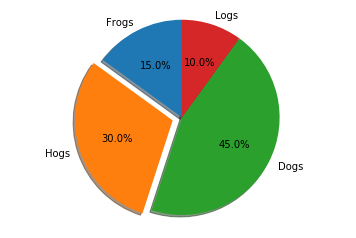

In [12]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [48]:
data.groupby('Species')['2016'].sum().head(10)

Species
Alm. hummer           67.72
Blanke/gule ål       402.39
Blåhvilling        39177.23
Blåmusling         84114.89
Brisling          431244.48
Dybvandhummer       4937.22
Dybvandsrejer       3914.96
Havgalt              416.61
Havkat               899.22
Havtaske            4569.22
Name: 2016, dtype: float64

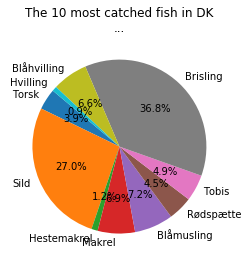

In [88]:
import matplotlib.pyplot as plt
import pandas as pd

all_seas = data.copy()
all_seas = all_seas.loc[all_seas['Area'] == 'All seas',:]
all_seas = all_seas.loc[all_seas['2016'] > 5000.00,:]
all_seas.head()

amount_2016 = all_seas['2016']
species_data = all_seas['Species']

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]

plt.pie(amount_2016, labels=species_data, explode=None, colors=None,
autopct='%1.1f%%', shadow=False, startangle=140)

plt.title("The 10 most catched fish in DK\n"+"...")

plt.show()